# Car Rental Data Analysis with Python

## Business Problem Statement

-- What factors influence total rental revenue the most?
(e.g., car type, rental duration, customer membership)

-- Which car makes and models are rented the most and generate the highest revenue?

-- What is the impact of membership status on rental frequency and total spend?

-- Are certain locations more likely to have late returns or maintenance issues?

-- Do younger or older customers tend to return cars in worse condition?

-- Which fuel types and transmissions are most popular among customers?

-- What is the average customer rating by car type or rental duration?

## importing my data

In [4]:
import pandas as pd
df = pd.read_csv("C:/Users/DELL/Downloads/car_rental_dataset.csv")

In [19]:
df.head()

,rental_id,customer_id,car_id,rental_date,return_date,rental_duration,rental_status,make,model,year,...,dropoff_location,pickup_time,dropoff_time,pickup_staff_id,dropoff_staff_id,car_condition_before,car_condition_after,damage_reported,maintenance_needed,cleaning_fee
0,R100000,C207077,CAR302689,2025-03-26,2025-04-05,10,Completed,Honda,CR-V,2017,...,Reyesview,2024-09-20 19:21:15,2023-07-27 14:50:25,S400112,S400878,Good,Fair,No,No,4.93
1,R100001,C204400,CAR303474,2024-01-15,2024-01-23,8,Active,BMW,3 Series,2022,...,Riveraland,2025-04-10 08:33:21,2025-03-10 08:35:36,S400737,S400939,Good,Fair,No,No,1.49
2,R100002,C209335,CAR303210,2024-05-26,2024-06-09,14,Completed,Honda,Civic,2017,...,Kelseychester,2024-12-25 05:03:32,2024-09-14 00:30:52,S400258,S400899,Fair,Damaged,Yes,Yes,13.57
3,R100003,C205128,CAR308239,2023-11-26,2023-12-09,13,Active,Ford,Escape,2023,...,Conradmouth,2024-07-29 14:40:27,2024-08-09 13:50:28,S400051,S400139,Good,Good,Yes,Yes,10.24
4,R100004,C202440,CAR301306,2023-11-29,2023-12-07,8,Completed,Honda,Accord,2021,...,South Bradley,2024-03-07 16:24:36,2024-11-12 01:55:01,S400002,S400348,Needs Maintenance,Good,Yes,No,0.00


# checking my data type

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rental_id              3000 non-null   object 
 1   customer_id            3000 non-null   object 
 2   car_id                 3000 non-null   object 
 3   rental_date            3000 non-null   object 
 4   return_date            3000 non-null   object 
 5   rental_duration        3000 non-null   int64  
 6   rental_status          3000 non-null   object 
 7   make                   3000 non-null   object 
 8   model                  3000 non-null   object 
 9   year                   3000 non-null   int64  
 10  car_type               3000 non-null   object 
 11  license_plate          3000 non-null   object 
 12  fuel_type              3000 non-null   object 
 13  transmission           3000 non-null   object 
 14  mileage                3000 non-null   int64  
 15  avai

# correcting my date data type

In [6]:
df['rental_date'] = pd.to_datetime(df['rental_date'])

In [8]:
df['rental_date'] = pd.to_datetime(df['pickup_time'])

In [10]:
df['rental_date'] = pd.to_datetime(df['dropoff_time'])

## What factors influence total rental revenue the most?
(e.g., car type, rental duration, customer membership)


Top factors influencing total rental revenue:

                     Feature  Importance
5            rental_duration    0.593398
6            customer_rating    0.141810
9               cleaning_fee    0.074150
7           discount_applied    0.055451
8                   late_fee    0.045715
4  membership_status_Regular    0.019546
3  membership_status_Premium    0.019470
2             car_type_Sedan    0.017766
1               car_type_SUV    0.017308
0         car_type_Hatchback    0.015385


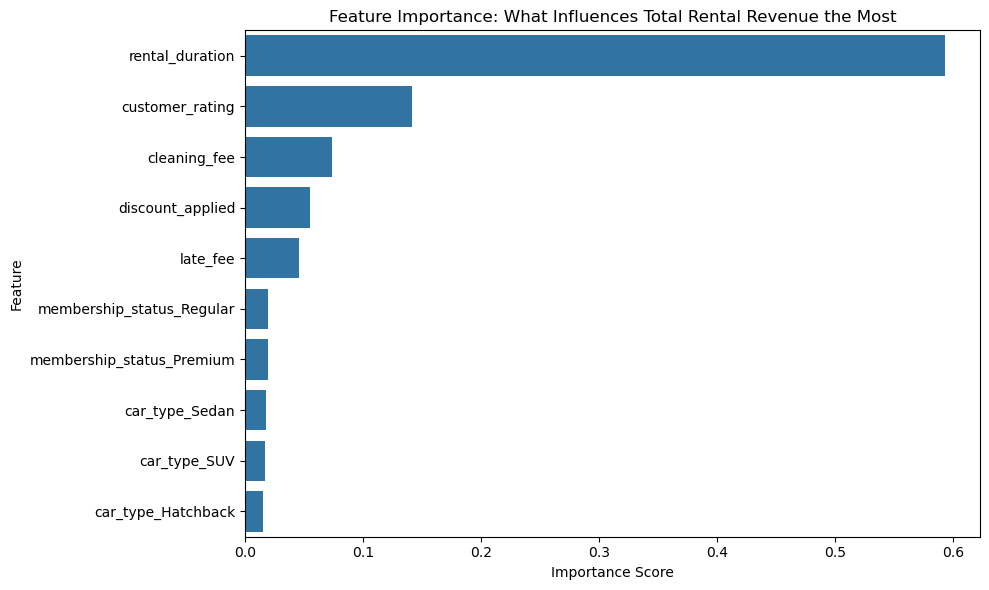

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("C:/Users/DELL/Downloads/car_rental_dataset.csv")  # Replace with your file path

# Select features that might influence total rental revenue
features = [
    'rental_duration', 'car_type', 'membership_status', 
    'customer_rating', 'discount_applied', 'late_fee', 'cleaning_fee'
]
target = 'total_amount'

X = df[features]
y = df[target]

# Identify categorical and numerical features
categorical_features = ['car_type', 'membership_status']
numerical_features = ['rental_duration', 'customer_rating', 'discount_applied', 'late_fee', 'cleaning_fee']

# Preprocessing: OneHotEncode categorical features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Get feature names
encoded_cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(encoded_cat_features) + numerical_features

# Extract feature importances
importances = pipeline.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top factors
print("Top factors influencing total rental revenue:\n")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance: What Influences Total Rental Revenue the Most')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Which car makes and models are rented the most and generate the highest revenue?


In [15]:
# Group by make and model
car_stats = df.groupby(['make', 'model']).agg(
    rental_count=('rental_id', 'count'),
    total_revenue=('total_amount', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

print(car_stats.head(10))  # Top 10 makes/models by revenue


       make     model  rental_count  total_revenue
2       BMW        X3           220      148221.70
9   Hyundai   Elantra           208      143525.79
0       BMW  3 Series           200      141892.79
6     Honda    Accord           206      141762.83
8     Honda     Civic           203      139525.06
13   Toyota   Corolla           217      137599.10
1       BMW  5 Series           214      134184.14
10  Hyundai    Sonata           194      133190.69
4      Ford     Focus           193      131697.99
5      Ford    Fusion           204      128651.65


## What is the impact of membership status on rental frequency and total spend?


In [86]:

# Group by membership status and calculate the rental frequency and total spend
membership_analysis = df.groupby('membership_status').agg(
    rental_frequency=('rental_id', 'count'),  # Number of rentals
    total_spend=('total_amount', 'sum')  # Total amount spent
).reset_index()

# Display the results
print(membership_analysis)


  membership_status  rental_frequency  total_spend
0              Gold              1028    697967.50
1           Premium               989    654114.17
2           Regular               983    612245.08


## Are certain locations more likely to have late returns or maintenance issues?


In [41]:
# Ensure 'maintenance_needed' column has consistent casing
df['maintenance_needed'] = df['maintenance_needed'].astype(str).str.lower()

# Filter for late returns and maintenance issues 
late_returns = df[df['late_fee'] > 0]
maintenance_issues = df[df['maintenance_needed'] == 'yes']

# Group by pickup and dropoff locations
late_by_location = late_returns.groupby(['pickup_location', 'dropoff_location']).size().reset_index(name='late_return_count')
maintenance_by_location = maintenance_issues.groupby(['pickup_location', 'dropoff_location']).size().reset_index(name='maintenance_issue_count')

# Sort by most frequent issues
late_by_location = late_by_location.sort_values(by='late_return_count', ascending=False)
maintenance_by_location = maintenance_by_location.sort_values(by='maintenance_issue_count', ascending=False)

# Display top results
print("Late Returns by Location:\n", late_by_location.head())
print("\nMaintenance Issues by Location:\n", maintenance_by_location.head())


Late Returns by Location:
     pickup_location      dropoff_location  late_return_count
0         Aaronport            Weaverberg                  1
495    Patrickburgh  North Matthewborough                  1
486     North Sarah    South Carolynmouth                  1
487    North Teresa      North Danielberg                  1
488   North Vanessa           Brandontown                  1

Maintenance Issues by Location:
         pickup_location dropoff_location  maintenance_issue_count
0          Aaronborough  North Susanland                        1
1063  Port Kimberlyview     Herringburgh                        1
1037         Port David        New James                        1
1036        Port Daniel       Robertport                        1
1035       Port Crystal     Melanieshire                        1


## Do younger or older customers tend to return cars in worse condition?


In [89]:
# Assume "worse condition" = difference between 'car_condition_before' and 'car_condition_after'
df['condition_changed'] = df['car_condition_before'] != df['car_condition_after']

# Group by age brackets
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])
condition_by_age = df.groupby('age_group', observed=False)['condition_changed'].mean().reset_index()

print(condition_by_age)


  age_group  condition_changed
0       <25           0.753378
1     25-35           0.793233
2     35-50           0.762315
3       50+           0.782353


## Which fuel types and transmissions are most popular among customers?


In [56]:
# Count by fuel_type and transmission
fuel_popularity = df['fuel_type'].value_counts()
transmission_popularity = df['transmission'].value_counts()

print("Fuel Type Popularity:\n", fuel_popularity)
print("\nTransmission Type Popularity:\n", transmission_popularity)


Fuel Type Popularity:
 fuel_type
Petrol      773
Hybrid      746
Diesel      746
Electric    735
Name: count, dtype: int64

Transmission Type Popularity:
 transmission
Automatic    1508
Manual       1492
Name: count, dtype: int64


## What is the average customer rating by car type or rental duration?


In [15]:
# Average rating by car type (sorted descending)
rating_by_car = df.groupby('car_type')['customer_rating'].mean().reset_index().sort_values(by='customer_rating', ascending=False)

# Categorize rental durations into buckets
df['rental_length'] = pd.cut(df['rental_duration'],
                             bins=[0, 3, 7, 14, 30, 60],
                             labels=['1-3 days', '4-7 days', '8-14 days', '15-30 days', '30+ days'])

# Average rating by rental duration category (sorted descending, with observed=True)
rating_by_duration = df.groupby('rental_length', observed=True)['customer_rating'].mean().reset_index().sort_values(by='customer_rating', ascending=False)

# Display results
print("Customer Rating by Car Type (Descending):\n", rating_by_car)
print("\nCustomer Rating by Rental Duration (Descending):\n", rating_by_duration)


Customer Rating by Car Type (Descending):
     car_type  customer_rating
3      Sedan         3.068477
0      Coupe         3.023368
1  Hatchback         2.971313
2        SUV         2.953784

Customer Rating by Rental Duration (Descending):
   rental_length  customer_rating
2     8-14 days         3.013840
1      4-7 days         3.008571
0      1-3 days         2.978955


## Insights, Business implications and Recommendation

### Q1: What factors influence total rental revenue the most?
**Insight:** Rental duration has the highest impact on total revenue, followed by customer rating, cleaning fees, discounts, and late fees.  
**Impact:** Revenue is primarily driven by how long a car is rented and how satisfied customers are.  
**Recommendation:** Encourage longer rentals through loyalty programs and improve customer experience to boost ratings and revenue.

### Q2: Which car makes and models are rented the most and generate the highest revenue?
**Insight:** BMW X3, Hyundai Elantra, and BMW 3 Series generate the highest revenue and rental counts.  
**Impact:** High-performing models contribute significantly to business profitability.  
**Recommendation:** Increase fleet size of top-performing models and prioritize their availability.

### Q3: What is the impact of membership status on rental frequency and total spend?
**Insight:** Gold members rent the most and spend the most, followed closely by Premium and Regular members.  
**Impact:** Membership tier strongly correlates with customer value.  
**Recommendation:** Retain Gold and Premium members with exclusive perks and incentivize upgrades for Regular members.

### Q4: Are certain locations more likely to have late returns or maintenance issues?
**Insight:** Incidents of late returns and maintenance issues are rare and spread across multiple locations, with each recording only one occurrence.  
**Impact:** No location consistently underperforms, making location-specific interventions ineffective for now.  
**Recommendation:** Maintain regular monitoring. Consider proactive communication or preventive maintenance in locations with even minor incident history.

### Q5: Do younger or older customers tend to return cars in worse condition?
**Insight:** Customers aged 25–35 have the highest rate of condition changes (79.3%), followed by those aged 50+ and 35–50.  
**Impact:** Mid-age renters are slightly more likely to return cars in worse condition.  
**Recommendation:** Provide clearer usage guidelines or optional vehicle protection plans for the 25–35 age group.

### Q6: Which fuel types and transmissions are most popular among customers?
**Insight:** Petrol is the most rented fuel type, closely followed by Hybrid and Diesel. Automatic and Manual transmissions are nearly equally preferred.  
**Impact:** A balanced mix of fuel types and transmission options caters to a wide customer base.  
**Recommendation:** Maintain a diverse fleet while gradually increasing the share of electric vehicles to stay future-ready.

### Q7: What is the average customer rating by car type or rental duration?
**Insight:** Sedans have the highest average rating (3.07), while rentals lasting 8–14 days receive the best ratings.  
**Impact:** Longer rentals and sedan-type cars tend to deliver better customer satisfaction.  
**Recommendation:** Promote 1–2 week rentals and offer sedans as preferred options during booking.
